#**Primer proyecto de Deep learning**

*Presentado por: Brayan Romero y Santiago Mendoza*


#Objetivo
Construir un modelo que halle el avalúo para el dataset dado

In [287]:
#Carga de librerias y modulos
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dropout
from keras.regularizers import l2

In [288]:
#Lectura de dataset convertido a forma numerica
data_file = '/content/datos_tarea.csv'
df = pd.read_csv(data_file)



#Eliminacion de features innecesarios
df = df.drop('VIG. INICIAL', axis=1)
df = df.drop('VIG. FINAL', axis=1)
df = df.drop('FUENTE', axis=1)

#Vista del dataset, para modelo
df

,TIPO DE PREDIO,ESTRATO SOCIAL,ÁREA DE TERRENO,ÁREA EDIFICADA,AVALÚO,TARIFA,DEUDA VIG. ANTERIOR,DEUDA VIG. ACTUAL,DESTINO ECONÓMICO_AGROPECUARIO,DESTINO ECONÓMICO_COMERCIAL,...,CLASE_ESTRATO-1,CLASE_ESTRATO-5,CLASE_ESTRATO-6,CLASE_LOTE URBANO,CLASE_OTROS RURALES NC,CLASE_PREDIO DEL MUNICIPIO,"CLASE_PREDIOS DE PARCELACION, FINCAS DE RECREO Y OTROS",CLASE_PREDIOS EXENTOS RELIGIOSOS,CLASE_SIN INFORMACIÓN,CLASE_TARIFA ESPECIAL (1-2-3)
0,1,4,60,0,15224000,25.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,60,144,80079000,3.9,941215,338854,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,3,84,66,57205000,4.6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,100000,17,10996000,7.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,60,58,30171000,3.9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,0,2,67,52,10643000,3.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5682,1,5,193,168,197594000,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5683,0,3,1152,0,28068000,9.0,422412,274084,0,0,...,0,0,0,0,0,0,1,0,0,0
5684,0,1,2530,115,5679000,7.0,0,172528,1,0,...,0,0,0,0,0,0,0,0,1,0


In [289]:
# Seleccionar solo las características numéricas para la normalización
numeric_features = ['ÁREA DE TERRENO', 'ÁREA EDIFICADA', 'AVALÚO','TARIFA', 'DEUDA VIG. ANTERIOR', 'DEUDA VIG. ACTUAL']

# Normalizar solo las características numéricas de entrada
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])






#Seleccionar features de entrada
X = df[['TIPO DE PREDIO', 'ESTRATO SOCIAL', 'ÁREA DE TERRENO', 'ÁREA EDIFICADA',
        'TARIFA', 'DEUDA VIG. ANTERIOR',
       'DEUDA VIG. ACTUAL', 'DESTINO ECONÓMICO_AGROPECUARIO',
       'DESTINO ECONÓMICO_COMERCIAL', 'DESTINO ECONÓMICO_CULTUTAL',
       'DESTINO ECONÓMICO_EDUCACIONAL', 'DESTINO ECONÓMICO_HABITACIONAL',
       'DESTINO ECONÓMICO_INDUSTRIAL', 'DESTINO ECONÓMICO_INSTITUCIONAL',
       'DESTINO ECONÓMICO_LOTE URBANIZABLE NO URBANIZADO',
       'DESTINO ECONÓMICO_RECREACIONAL', 'DESTINO ECONÓMICO_RELIGIOSO',
       'DESTINO ECONÓMICO_USO PUBLICO', 'CLASE_BIENES DE USO PUBLICO',
       'CLASE_ESTRATO-1', 'CLASE_ESTRATO-5', 'CLASE_ESTRATO-6',
       'CLASE_LOTE URBANO', 'CLASE_OTROS RURALES NC',
       'CLASE_PREDIO DEL MUNICIPIO',
       'CLASE_PREDIOS DE PARCELACION, FINCAS DE RECREO Y OTROS',
       'CLASE_PREDIOS EXENTOS RELIGIOSOS', 'CLASE_SIN INFORMACIÓN',
       'CLASE_TARIFA ESPECIAL (1-2-3)']]

#Seleccionar dato a predecir
y = df['AVALÚO']


# Realizar el split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Dataframe no sirve para el modelo

# Convertir a matrices NumPy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Verificar los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))



Tamaño del conjunto de entrenamiento: 4548
Tamaño del conjunto de prueba: 1138


#Creacion de modelos

#Modelos con *overfitting*

In [290]:
def build_model():
  model = Sequential([
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(1)
  ])

  model.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"])
  return model

model = build_model()
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=16, verbose=1,
                    validation_split=0.2)

Epoch 1/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8548 - mae: 0.2101 - val_loss: 0.3278 - val_mae: 0.1832
Epoch 2/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8167 - mae: 0.1781 - val_loss: 0.3818 - val_mae: 0.1616
Epoch 3/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8030 - mae: 0.1743 - val_loss: 0.2302 - val_mae: 0.1634
Epoch 4/30
228/228 [==============================] - 1s 2ms/step - loss: 0.7910 - mae: 0.1714 - val_loss: 0.2477 - val_mae: 0.2141
Epoch 5/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7897 - mae: 0.1685 - val_loss: 0.2397 - val_mae: 0.1898
Epoch 6/30
228/228 [==============================] - 1s 2ms/step - loss: 0.7757 - mae: 0.1653 - val_loss: 0.4510 - val_mae: 0.2193
Epoch 7/30
228/228 [==============================] - 1s 2ms/step - loss: 0.7729 - mae: 0.1652 - val_loss: 0.2962 - val_mae: 0.2503
Epoch 8/30
228/228 [==============================] - 0s 2ms/step - loss: 0.

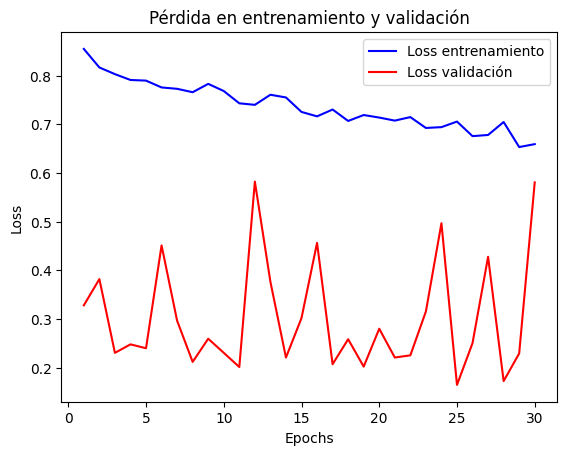

In [291]:
# Gráfica de pérdida modelo overfitting 1

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'b', label='Loss entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Segundo Modelo con overfitting

In [292]:
def build_model():
    model = Sequential([
        Dense(64, activation="relu"),
        Dropout(0.1),
        Dense(128, activation="relu"),
        Dropout(0.1),
        Dense(1)
    ])

    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"])
    return model

model = build_model()
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=16, verbose=1,
                    validation_split=0.2)

Epoch 1/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8590 - mae: 0.2255 - val_loss: 0.8291 - val_mae: 0.1900
Epoch 2/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8322 - mae: 0.1901 - val_loss: 0.5604 - val_mae: 0.1929
Epoch 3/30
228/228 [==============================] - 1s 4ms/step - loss: 0.8244 - mae: 0.1826 - val_loss: 0.8543 - val_mae: 0.1849
Epoch 4/30
228/228 [==============================] - 1s 4ms/step - loss: 0.8111 - mae: 0.1754 - val_loss: 0.8109 - val_mae: 0.1864
Epoch 5/30
228/228 [==============================] - 1s 4ms/step - loss: 0.8088 - mae: 0.1670 - val_loss: 0.6273 - val_mae: 0.1770
Epoch 6/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7927 - mae: 0.1654 - val_loss: 0.7350 - val_mae: 0.1852
Epoch 7/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7917 - mae: 0.1662 - val_loss: 0.9280 - val_mae: 0.1787
Epoch 8/30
228/228 [==============================] - 1s 3ms/step - loss: 0.

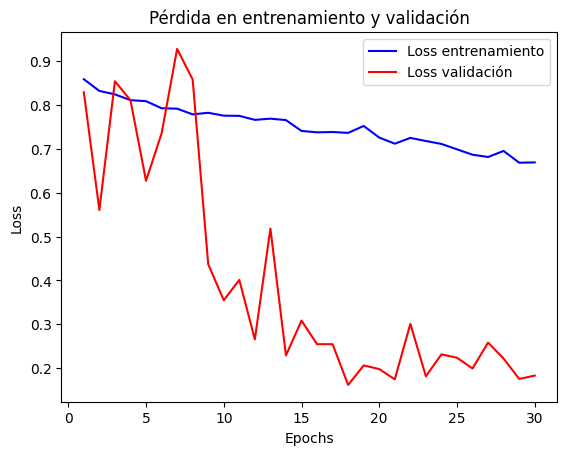

In [293]:
# Gráfica de pérdida modelo overfitting 2

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'b', label='Loss entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Modelo propuesto

In [294]:
def build_model():
    model = Sequential([
        Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
        Dense(1)
    ])

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae"])
    return model


model = build_model()
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=16, verbose=1,
                    validation_split=0.2)

Epoch 1/30
228/228 [==============================] - 1s 3ms/step - loss: 0.9498 - mae: 0.2121 - val_loss: 0.7169 - val_mae: 0.3984
Epoch 2/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8674 - mae: 0.1822 - val_loss: 0.4893 - val_mae: 0.2495
Epoch 3/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8442 - mae: 0.1731 - val_loss: 0.3807 - val_mae: 0.2337
Epoch 4/30
228/228 [==============================] - 1s 3ms/step - loss: 0.8259 - mae: 0.1769 - val_loss: 0.3049 - val_mae: 0.1603
Epoch 5/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7899 - mae: 0.1688 - val_loss: 0.2710 - val_mae: 0.1719
Epoch 6/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7832 - mae: 0.1774 - val_loss: 0.4552 - val_mae: 0.1808
Epoch 7/30
228/228 [==============================] - 1s 3ms/step - loss: 0.7484 - mae: 0.1701 - val_loss: 0.2812 - val_mae: 0.1670
Epoch 8/30
228/228 [==============================] - 1s 3ms/step - loss: 0.

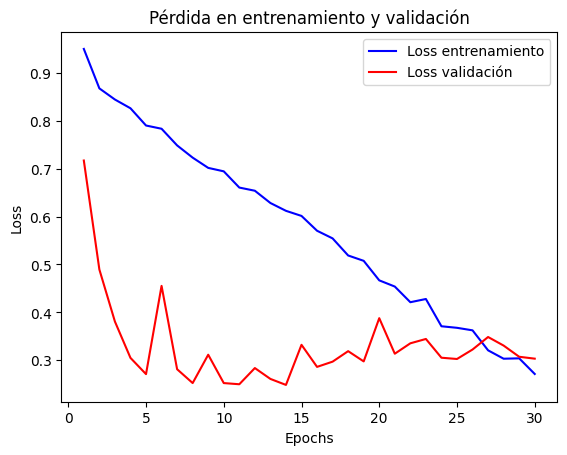

In [295]:
# Gráfica de pérdida
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'b', label='Loss entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss validación')
plt.title('Pérdida en entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [296]:
predictions = model.predict(X_train)
predictions[1500]


143/143 [==============================] - 0s 2ms/step


array([-0.09949419], dtype=float32)